In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b9ac8678c3d39a32a5dc16e0d5c2f05361afbedf011e09b942def3ef7e134bcd
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch as nn
import os, json
import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F


In [ ]:
from lime.lime_image import LimeImageExplainer

# 예측 함수 모양 맞추기

In [ ]:
def get_imput_transform():
  normalize = transform.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])
  tranf = transforms.Compose([
          transforms.Resize((256,256)),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          normalize
  ])

  return transf

def get_input_tensors(img):
  transf = get_input_transform()

  return transf(img).unsqueeze(0)

In [ ]:
model = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

In [ ]:
import numpy as np

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /LIME/1_static_LSH_frame4.jpg'

In [ ]:
Image = Image.open(path)

In [ ]:
Image = np.array(Image).shape
Image

(3,)

# LIME dog/cat

### limepackage image module

In [ ]:
from lime.lime_image import LimeImageExplainer

In [ ]:
# Explainer생성

In [ ]:
explainer = LimeImageExplainer()

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import sklearn.cluster

In [ ]:
model = InceptionV3()

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
from PIL import Image
import requests
url = 'https://i.guim.co.uk/img/media/c9b0aad22638133aa06cd68347bed2390b555e63/0_477_2945_1767/master/2945.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=97bf92d90f51da7067d00f8156512925'
image_cat = Image.open(requests.get(url, stream=True).raw)
image_cat = image_cat.resize((299,299))

In [ ]:
url_re = 'https://images.unsplash.com/photo-1558788353-f76d92427f16?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1938&q=80'
image_ret = Image.open(requests.get(url_re, stream=True).raw)
image_ret = image_ret.resize((299,299))


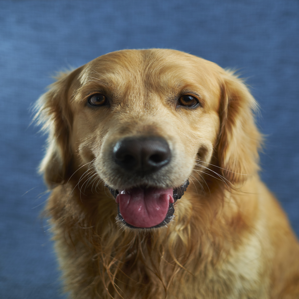

In [ ]:
image_ret

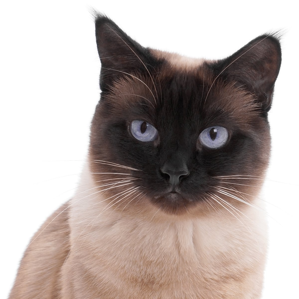

In [ ]:
image_cat

In [ ]:
# Convert to numpy array, reshape and preprocess
image = img_to_array(image_cat)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
image[0].shape

(299, 299, 3)

In [ ]:
# Convert to numpy array, reshape and preprocess
image_re = img_to_array(image_ret)
image_re = image_re.reshape((1, image_re.shape[0], image_re.shape[1], image_re.shape[2]))
image_re = preprocess_input(image_re)
image_re[0].shape
predictions_re = model.predict(image_re)

In [ ]:
predictions = model.predict(image)

# LIME

In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

In [ ]:
#function of keras, allows to see the prob of each prediction
decode_predictions(predictions)

[[('n02123597', 'Siamese_cat', 0.93343866),
  ('n02124075', 'Egyptian_cat', 0.0016490931),
  ('n04553703', 'washbasin', 0.0011165539),
  ('n04493381', 'tub', 0.0010486458),
  ('n02123045', 'tabby', 0.00096356566)]]

In [ ]:
decode_predictions(predictions_re)

[[('n02099601', 'golden_retriever', 0.93311375),
  ('n04409515', 'tennis_ball', 0.023750836),
  ('n02100877', 'Irish_setter', 0.0021948363),
  ('n02099712', 'Labrador_retriever', 0.001994039),
  ('n02099267', 'flat-coated_retriever', 0.0015643659)]]

In [ ]:
# extract the index of the top 5 classes predicted by the model for the image selected 
model.predict(image).argsort()[0, -5:][::-1]

#keep the index of the first and the second class 
first_class = model.predict(image).argsort()[0, -5:][-1]
second_class = model.predict(image).argsort()[0, -5:][-2]

In [ ]:
# extract the index of the top 5 classes predicted by the model for the image selected 
model.predict(image_re).argsort()[0, -5:][::-1]

#keep the index of the first and the second class 
first_class_re = model.predict(image_re).argsort()[0, -5:][-1]
second_class_re = model.predict(image_re).argsort()[0, -5:][-2]

In [ ]:
explainer = LimeImageExplainer()

In [ ]:
seg_algo = ['slic', 'quickshift', 'fekzebszwalb']
segmenter = SegmentationAlgorithm(seg_algo[0],
                                  n_segmentation = 100,
                                  compactness = 1,
                                  sigma = 1)
segmenter_q = SegmentationAlgorithm(seg_algo[1],
                                  n_segmentation = 100,
                                  compactness = 1,
                                  sigma = 1)

In [ ]:
seg_algo[0]

'slic'

In [ ]:
explanation = explainer.explain_instance(image[0], #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=500, # number of observation sampled from the original distribution in order to computer the linear regression
                                         segmentation_fn = segmenter)

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
explanation_re = explainer.explain_instance(image_re[0], #the image
                                            model.predict, 
                                            top_labels=2, #want just to see the 2 main classes predicted
                                            num_samples=500, # number of observation sampled from the original distribution in order to computer the linear regression
                                            segmentation_fn = segmenter)

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
explanation = explainer.explain_instance(image[0], #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=500, # number of observation sampled from the original distribution in order to computer the linear regression
                                         random_seed=42)

In [ ]:
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

mask for prediction of class:  Siamese_cat


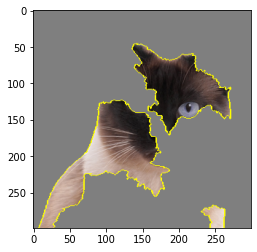

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(first_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][0][1])

49152/35363 [=========================================] - 0s 0us/step
mask for prediction of class:  Siamese_cat


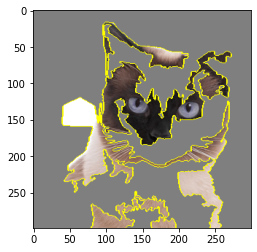

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(first_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][0][1])

mask for prediction of class:  Egyptian_cat


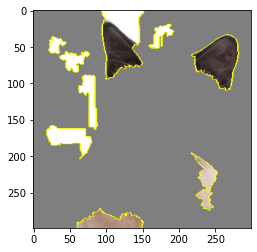

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=11, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ', decode_predictions(predictions)[0][1][1])

mask for prediction of class:  Egyptian_cat


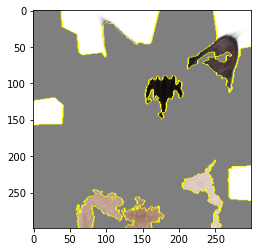

In [ ]:
# maps for the second class predicted 
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=11, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ', decode_predictions(predictions)[0][1][1])

mask for prediction of class:  golden_retriever


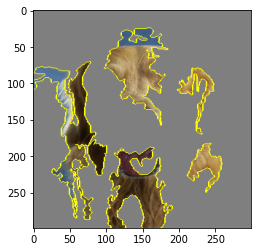

In [ ]:
# maps for the first class predicted
temp_re, mask_re = explanation_re.get_image_and_mask(first_class_re, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp_re / 2 + 0.5, mask_re))
print('mask for prediction of class: ',decode_predictions(predictions_re)[0][0][1])

mask for prediction of class:  tennis_ball


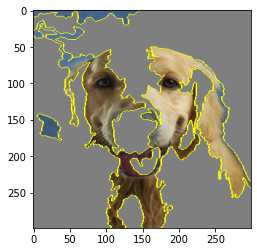

In [ ]:
# maps for the first class predicted
temp_re, mask_re = explanation_re.get_image_and_mask(second_class_re, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp_re / 2 + 0.5, mask_re))
print('mask for prediction of class: ',decode_predictions(predictions_re)[0][1][1])

In [ ]:
from keras.applications import inception_v3 as inc_net
inet_model = inc_net.InceptionV3()

# LIME-Toucan 

In [ ]:
from keras.applications import vgg16, vgg19

In [ ]:
model = vgg19.VGG19()

574726144/574710816 [==============================] - 5s 0us/step


In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

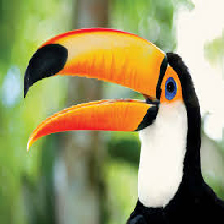

In [ ]:
image_toucan = load_img("/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /LIME/toucan.jpeg", target_size=(224,224))
image_toucan

In [ ]:
image = img_to_array(image_toucan)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [ ]:
model

In [ ]:
predictions = model.predict(image)

In [ ]:
decode_predictions(predictions)

[[('n01843383', 'toucan', 0.9998522),
  ('n01829413', 'hornbill', 0.00014782466),
  ('n02002724', 'black_stork', 1.6635608e-10),
  ('n01847000', 'drake', 1.2192827e-10),
  ('n02056570', 'king_penguin', 7.152512e-11)]]

In [ ]:
model.predict(image).argsort()[0, -5:][::-1]

array([ 96,  93, 128,  97, 145])

In [ ]:
from lime.lime_image import LimeImageExplainer

In [ ]:
explainer = LimeImageExplainer()

In [ ]:
image[0].shape

(224, 224, 3)

In [ ]:
explanation = explainer.explain_instance(image[0], model.predict,
                                         top_labels = 2, num_samples=100,
                                         random_seed=42)

In [ ]:
explanation = explainer.explain_instance(image[0], model.predict,
                                         top_labels = 2, num_samples=100,
                                         segmentation_fn = segmenter)

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# extract the index of the top 5 classes predicted by the model for the image selected 
model.predict(image).argsort()[0, -5:][::-1]

#keep the index of the first and the second class 
first_class = model.predict(image).argsort()[0, -5:][-1]
second_class = model.predict(image).argsort()[0, -5:][-2]

In [ ]:
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


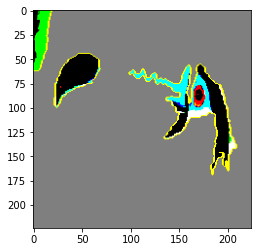

In [ ]:
temp, mask = explanation.get_image_and_mask(96, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask for prediction of class:  toucan


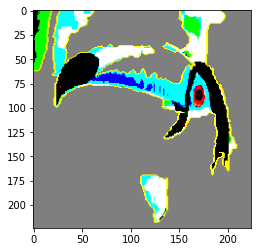

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(first_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][0][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask for prediction of class:  hornbill


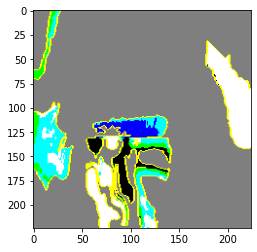

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][1][1])

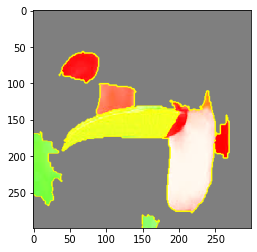

In [ ]:
temp, mask = explanation.get_image_and_mask(779, positive_only=False, num_features=8, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
image_lab = load_img("/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /LIME/labrador_baby.png", target_size=(224,224))

In [ ]:
image = img_to_array(image_lab)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [ ]:
predictions = model.predict(image)

In [ ]:
decode_predictions(predictions)

[[('n02104029', 'kuvasz', 0.5117541),
  ('n02099601', 'golden_retriever', 0.3744437),
  ('n02111500', 'Great_Pyrenees', 0.061963983),
  ('n02113799', 'standard_poodle', 0.031375386),
  ('n02099712', 'Labrador_retriever', 0.005210215)]]

In [ ]:
model.predict(image).argsort()[0, -5:][::-1]

array([222, 207, 257, 267, 208])

In [ ]:
explainer = LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(image[0], model.predict,
                                         top_labels = 2, num_samples=100,
                                         segmentation_fn = segmenter)

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# extract the index of the top 5 classes predicted by the model for the image selected 
model.predict(image).argsort()[0, -5:][::-1]

#keep the index of the first and the second class 
first_class = model.predict(image).argsort()[0, -5:][-1]
second_class = model.predict(image).argsort()[0, -5:][-2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask for prediction of class:  kuvasz


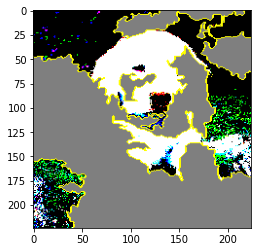

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(first_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][0][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask for prediction of class:  golden_retriever


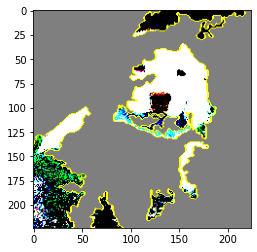

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][1][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask for prediction of class:  golden_retriever


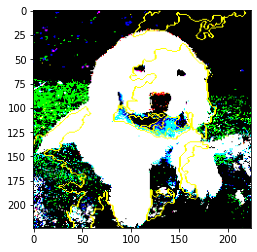

In [ ]:
# maps for the first class predicted
temp, mask = explanation.get_image_and_mask(second_class, positive_only=True, num_features=10, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
print('mask for prediction of class: ',decode_predictions(predictions)[0][1][1])

# LIME-CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [ ]:
batch_size = 32
img_height = 299
img_width = 299

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


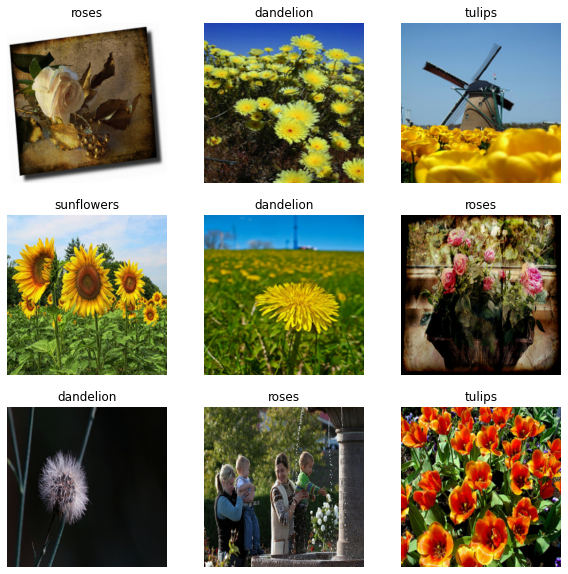

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 299, 299, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 10
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(32, (3,3), activation='relu'),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Conv2D(64, (3,3), activation='relu'),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Conv2D(64, (3,3), activation='relu'),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 299, 299, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 299, 299, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)       

In [ ]:
model.layers[0]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 449s 5s/step - loss: 1.6392 - accuracy: 0.3282 - val_loss: 1.1465 - val_accuracy: 0.5082
Epoch 2/10
92/92 [==============================] - 425s 5s/step - loss: 1.1721 - accuracy: 0.5036 - val_loss: 1.2081 - val_accuracy: 0.5136
Epoch 3/10
92/92 [==============================] - 425s 5s/step - loss: 1.0968 - accuracy: 0.5737 - val_loss: 0.9778 - val_accuracy: 0.5913
Epoch 4/10
92/92 [==============================] - 423s 5s/step - loss: 1.0131 - accuracy: 0.6094 - val_loss: 0.9045 - val_accuracy: 0.6499
Epoch 5/10
92/92 [==============================] - 423s 5s/step - loss: 0.9183 - accuracy: 0.6565 - val_loss: 0.9415 - val_accuracy: 0.6417
Epoch 6/10
92/92 [==============================] - 422s 5s/step - loss: 0.8935 - accuracy: 0.6557 - val_loss: 0.8356 - val_accuracy: 0.6621
Epoch 7/10
92/92 [==============================] - 426s 5s/step - loss: 0.8244 - accuracy: 0.6848 - val_loss: 0.8523 - val_accuracy: 0.6866
Epoch 8/10
92

In [ ]:
image_number = 2

In [ ]:
image = images[3].numpy().astype("uint8")

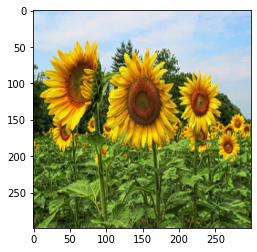

In [ ]:
plt.imshow(image)

In [ ]:
explainer = lime_image.LimeImageExplainer()

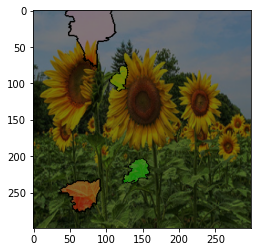

In [ ]:
explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=100)
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))

In [ ]:
image2 = images[7].numpy().astype("uint8")

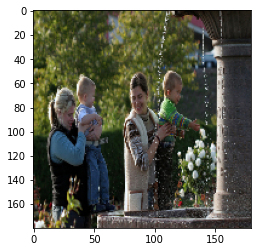

In [ ]:
plt.imshow(image2)
plt.show()

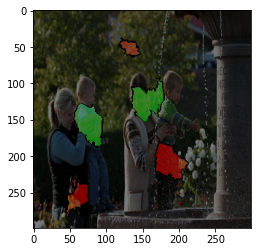

In [ ]:
explanation = explainer.explain_instance(image2, model.predict, top_labels=10, hide_color=0, num_samples=100)
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))

In [ ]:
model = InceptionV3()

In [ ]:
predictions = model.predict(image_batch)

In [ ]:
decode_predictions(predictions)

In [ ]:
explanation = explainer.explain_instance(image2, model.predict, top_labels=10, hide_color=0, num_samples=1000)


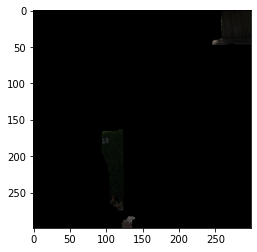

In [ ]:
temp, mask = explanation.get_image_and_mask(4, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))

In [ ]:
explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=100)


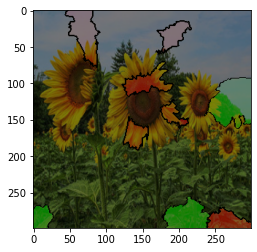

In [ ]:
temp, mask = explanation.get_image_and_mask(4, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))

In [ ]:
explanation = explainer.explain_instance(image, model.predict, top_labels=10, hide_color=0, num_samples=1000)

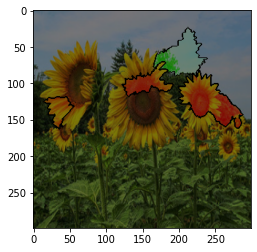

In [ ]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))

In [ ]:
image9 = images[8].numpy().astype("uint8")

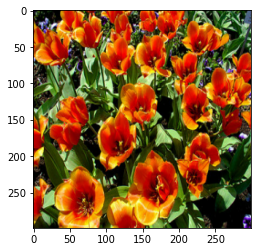

In [ ]:
plt.imshow(image9)
plt.show()

In [ ]:
explanation = explainer.explain_instance(image9, model.predict, top_labels=10, hide_color=0, num_samples=1000)

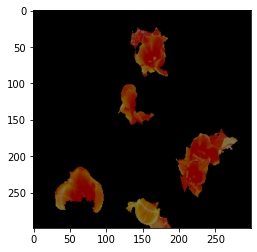

In [ ]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))